In [107]:
import numpy as np 
import math
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#grep our dataset from csv file
data=pd.read_csv('Fraud.csv')

In [24]:
#summary
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [29]:
num=str(data['step'].count())
print('In Audit dataset we have '+ num +' observation on credit card transactions')

In Audit dataset we have 6362620 observation on credit card transactions


In [50]:
data.info() #we have 3 categorical variables (nameOrig, type and nameDest)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [46]:
data.isna().sum() #there are no missing values in our dataset

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [45]:
data.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [51]:
data['isFlaggedFraud'].unique() #boolean target value (fraudolent[1] or not[0])

array([0, 1], dtype=int64)

In [47]:
data.type.unique() #let's display the type of cards in the data

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

<AxesSubplot:>

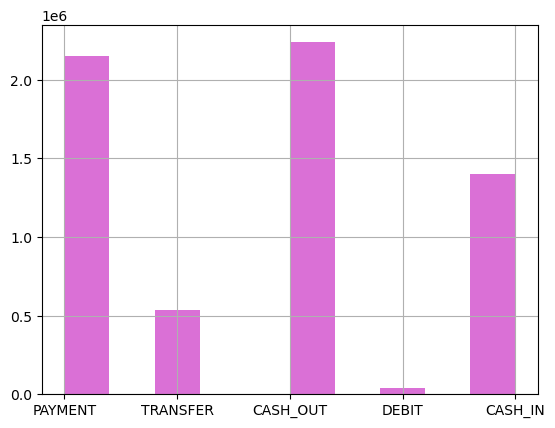

In [42]:
#EXPLORATORY ANALYSIS
data['type'].hist(bins=10, color='orchid')
#display the amount of cards

<AxesSubplot:ylabel='Frequency'>

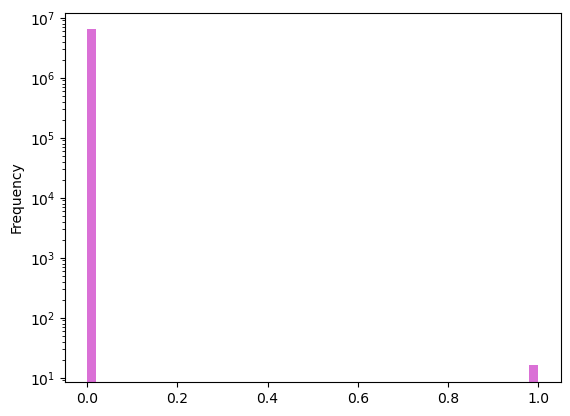

In [64]:
bins = np.linspace(0,6362620 ,50)
data['isFlaggedFraud'].plot(kind='hist', bins=50, color='orchid',logy=True)
#clearly a unbalanced situation in the data

In [91]:
output_variable=data['isFlaggedFraud']
x=0
y=0
for i in range(len(output_variable)):
    if output_variable[i]==1:
        x+=1
    elif output_variable[i]==0:
        y+=1
        
fraudolent=str(x)
not_fraudolent=str(y)


In [78]:
print('There are '+fraudolent+' fraudolent transactions and '+not_fraudolent+' not fraudolent transactions')

There are 16 fraudolent transactions and 6362604 not fraudolent transactions


In [114]:
train, test = train_test_split(data, test_size=0.3)
a,b=train['type'].count(),test['type'].count()
a,b #number of observations in train and test

(4453834, 1908786)